### **Problem Statement: Airbnb Hotel Booking Analysis.**
The hospitality industry has undergone a significant transformation with the rise of online platforms facilitating short term lodging and tourism Leading this revolution is Airbnb, Inc., a pioneering American company that has reshaped travel accommodation through its innovative online marketplace. Established in 2008 in San Francisco, California, Airbnb provides a diverse range of lodging options, offering guests a unique and personalized experience Unlike traditional hospitality providers, Airbnb operates on a commission-based model, facilitating transactions between hosts and guests without owning the properties listed on its platform.

This research analysis delves into the New York City Airbnb dataset to extract meaningful insights. Through rigorous data cleaning, exploratory analysis, and visualization techniques, the study aims to illuminate the dynamics of the city's lodging market. By discerning factors influencing listing availability, pricing strategies, and overall customer satisfaction, the research contributes to a deeper understanding of Airbnb's operations in one of the world's most dynamic urban environments. These insights hold significance for stakeholders and enthusiasts seeking to navigate the evolving landscape of short-term accommodation.

### QUESTIONS
This project is aimed to uncover some insights from the Airbnb Open Data. The following questions would be answered from the data

1. What are the different property types in the Dataset?

2. Which neighborhood group has the highest number of listings?

3. Which neighborhoods group have the highest average prices for Airbnb listings

4. Is there a relationship between the construction year of property and price?

5. Who are the top 10 hosts by calculated host listing count?

6. Are hosts with verified identities more likely to receive positive reviews?

7. Is there a correlation between the price of a listing and its service fee?

### DATA WRANGLING
Data wrangling, a crucial phase in the data analysis process, involves preparing and cleaning raw data to make it suitable for analysis. This involves various tasks such as handling missing values, removing duplicates, and transforming data into a consistent format. Effective data wrangling ensures that the data is reliable and ready for exploration, enabling meaningful insights to be derived from it

In [37]:
# Import essential libraries for Data Analysis & Visualization
import numpy as np              # Numerical computations
import pandas as pd             # Data manipulation & analysis
import matplotlib.pyplot as plt # Basic plotting
import seaborn as sns           # Advanced statistical visualization
import plotly.express as px     # Interactive visualizations

# Set default plot styles for better readability
plt.style.use('seaborn-v0_8')
sns.set_theme(palette="Set2")

### ACCESS THE DATA

In [38]:
# ======================================
# 📂 Load the Airbnb Dataset
# ======================================

# Option 1: If the file is in CSV format (commented for flexibility)
# df = pd.read_csv('/content/1730285881-Airbnb_Open_Data.csv', low_memory=False)

# Option 2: Reading from Excel (actual dataset provided)
df = pd.read_excel('/content/1730285881-Airbnb_Open_Data.xlsx')

# 🔍 Quick checks after loading
print("✅ Data Loaded Successfully!")
print("Shape of dataset:", df.shape)   # Number of rows & columns
df.head()                              # Display first 5 rows

✅ Data Loaded Successfully!
Shape of dataset: (102599, 26)


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [39]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [40]:
# Check for duplicate records in the dataset
duplicate_counts = df.duplicated().value_counts()
print("✅ Duplicate Record Summary:")
print(duplicate_counts)

✅ Duplicate Record Summary:
False    102058
True        541
Name: count, dtype: int64


In [41]:
# 🔍 Check for incorrect spelling in 'neighbourhood group' column
incorrect_entries = df[df['neighbourhood group'].str.lower() == 'brookin']
print("Incorrectly spelled 'neighbourhood group' entries:")
display(incorrect_entries)

# Count how many records are affected
print("\nTotal incorrect entries:", incorrect_entries.shape[0])

Incorrectly spelled 'neighbourhood group' entries:


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license



Total incorrect entries: 0


### Problems Identified within the Data
* 541 duplicated Records where found in the Data.
* Insufficient information were recorded for the house_rules and Licence columns.
* Dollar signs and commas recorded along with the values for price and service fee.
* The currency for price and service fee were not added to the column's titles.
* Missing values in some records
* Columns like the price, service fee. id. host id. last review, Construction year are assigned wrong datatypes.
* In the neighbourhood group column the spelling of 'Brooklyn' was misspelt in some records.
* Some outliers were identified in the availability 365 column.

## CLEAN THE DATA
### Steps to be Taken for Data Cleaning
* Drop duplicated records.
* Drop house_rules and license columns with insufficient data.
* Remove all dollar signs in the price and service fee columns.
* Remove all commas from the price and service fee columns.
* Rename the price and service fee columns to include a dollar signs.
* Drop all records with missing values.
* Change all mismatched data types to the appropriate once.
* Correct the Spelling of 'brookln' to 'Brooklyn'
* Get rid of outliers in the 'availability 365' column data.

In [42]:
# ======================================
# 🧹 Data Cleaning / Wrangling (Robust Version)
# ======================================

# 1️⃣ Drop duplicate records
df.drop_duplicates(inplace=True)

# 2️⃣ Drop columns with insufficient data (if they exist)
df.drop(['house_rules', 'license'], axis=1, inplace=True, errors='ignore')

# 3️⃣ Ensure 'price' and 'service fee' are strings, then remove $ and commas
for col in ['price', 'service fee']:
    if col in df.columns:  # check column exists
        df[col] = df[col].astype(str)
        df[col] = df[col].str.replace('$', '', regex=False)
        df[col] = df[col].str.replace(',', '', regex=False)

# 4️⃣ Rename columns to include dollar sign
df.rename(columns={'price':'price_$', 'service fee':'service_fee_$'}, inplace=True)

# 5️⃣ Drop rows with missing values
df.dropna(inplace=True)

# 6️⃣ Convert columns to appropriate datatypes
if 'price_$' in df.columns:
    df['price_$'] = df['price_$'].astype(float)
if 'service_fee_$' in df.columns:
    df['service_fee_$'] = df['service_fee_$'].astype(float)

df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'], errors='coerce')
df['Construction year'] = df['Construction year'].astype(int)

# 7️⃣ Correct misspelled 'neighbourhood group' entries
df['neighbourhood group'] = df['neighbourhood group'].replace({'brookln':'Brooklyn', 'brookIn':'Brooklyn'})

# 8️⃣ Remove outliers in 'availability 365' (>500 days)
df = df[df['availability 365'] <= 500]

# ✅ Summary after cleaning
print("Data Cleaning Completed!")
print("Dataset shape after cleaning:", df.shape)
df.info()

Data Cleaning Completed!
Dataset shape after cleaning: (83796, 24)
<class 'pandas.core.frame.DataFrame'>
Index: 83796 entries, 0 to 102057
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83796 non-null  object        
 1   NAME                            83796 non-null  object        
 2   host id                         83796 non-null  object        
 3   host_identity_verified          83796 non-null  object        
 4   host name                       83796 non-null  object        
 5   neighbourhood group             83796 non-null  object        
 6   neighbourhood                   83796 non-null  object        
 7   lat                             83796 non-null  float64       
 8   long                            83796 non-null  float64       
 9   country                         83796 non-null  object        
 10  country

In [43]:
# ======================================
# 🧹 Data Cleaning / Wrangling (No Warnings Version)
# ======================================

# Work on a copy of the dataframe to avoid SettingWithCopyWarning
df = df.copy()

# 1️⃣ Drop duplicate records
df.drop_duplicates(inplace=True)

# 2️⃣ Drop columns with insufficient data
df.drop(['house_rules', 'license'], axis=1, inplace=True, errors='ignore')

# 3️⃣ Clean 'price' and 'service fee' columns: remove $ and commas
for col in ['price', 'service fee']:
    if col in df.columns:
        df.loc[:, col] = df[col].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)

# 4️⃣ Rename columns to include dollar sign
df.rename(columns={'price':'price_$', 'service fee':'service_fee_$'}, inplace=True)

# 5️⃣ Drop rows with missing values
df.dropna(inplace=True)

# 6️⃣ Convert columns to proper datatypes
for col in ['price_$', 'service_fee_$']:
    if col in df.columns:
        df.loc[:, col] = df[col].astype(float)

df.loc[:, 'id'] = df['id'].astype(str)
df.loc[:, 'host id'] = df['host id'].astype(str)
df.loc[:, 'last review'] = pd.to_datetime(df['last review'], errors='coerce')
df.loc[:, 'Construction year'] = df['Construction year'].astype(int)

# 7️⃣ Correct misspelled 'neighbourhood group' entries
df.loc[:, 'neighbourhood group'] = df['neighbourhood group'].replace({'brookln':'Brooklyn', 'brookIn':'Brooklyn'})

# 8️⃣ Remove outliers in 'availability 365' (>500 days)
df = df[df['availability 365'] <= 500]

# ✅ Summary after cleaning
print("✅ Data Cleaning Completed! No Warnings")
print("Dataset shape after cleaning:", df.shape)
df.info()


✅ Data Cleaning Completed! No Warnings
Dataset shape after cleaning: (83389, 24)
<class 'pandas.core.frame.DataFrame'>
Index: 83389 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83389 non-null  object        
 1   NAME                            83389 non-null  object        
 2   host id                         83389 non-null  object        
 3   host_identity_verified          83389 non-null  object        
 4   host name                       83389 non-null  object        
 5   neighbourhood group             83389 non-null  object        
 6   neighbourhood                   83389 non-null  object        
 7   lat                             83389 non-null  float64       
 8   long                            83389 non-null  float64       
 9   country                         83389 non-null  object       

In [44]:
# ======================================
# 🔍 Check for Duplicate Records (Post-Cleaning)
# ======================================

duplicate_counts = df.duplicated().value_counts()
print("✅ Duplicate Record Summary (Post-Cleaning):")
print(duplicate_counts)

✅ Duplicate Record Summary (Post-Cleaning):
False    83389
Name: count, dtype: int64


In [45]:
# ======================================
# 🔍 Dataset Info (Post-Cleaning)
# ======================================

# Display summary information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83389 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83389 non-null  object        
 1   NAME                            83389 non-null  object        
 2   host id                         83389 non-null  object        
 3   host_identity_verified          83389 non-null  object        
 4   host name                       83389 non-null  object        
 5   neighbourhood group             83389 non-null  object        
 6   neighbourhood                   83389 non-null  object        
 7   lat                             83389 non-null  float64       
 8   long                            83389 non-null  float64       
 9   country                         83389 non-null  object        
 10  country code                    83389 non-null  object        
 11  instan

### EXPLORATORY DATA ANALYSIS (EDA)
Exploratory Data Analysis (EDA) is a vital phase in data analysis, involving the examination and visualization of data to uncover patterns. trends, and insights. In the context of an Airbnb data analysis project, EDA allows researchers to gain a comprehensive understanding Of the dataset's
characteristics, distribution. and relationships between variables. Through techniques such as summary statistics, data visualization, and
correlation analysis, EDA sets the stage for further investigation and hypothesis testing, guiding subsequent analytical decisions.

In [46]:
# ======================================
# 📊 Summary Statistics (Post-Cleaning)
# ======================================

# Generate descriptive statistics for numerical columns
df.describe()

,lat,long,instant_bookable,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389,83389.000000,83389.000000,83389.000000,83389.000000
mean,40.727349,-73.948502,0.497704,2012.487810,626.209668,125.243114,7.406109,32.261305,2019-06-08 21:32:53.396971008,1.377352,3.278694,7.032894,141.746369
min,40.504560,-74.249840,0.000000,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687640,-73.982110,0.000000,2007.000000,340.000000,68.000000,2.000000,3.000000,2018-10-25 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721320,-73.953710,0.000000,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762600,-73.930800,1.000000,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,426.000000
std,0.056326,0.050342,0.499998,5.760526,331.803443,66.364212,28.105563,51.954290,NaN,1.751091,1.283678,29.555458,133.377544


### What are the different property types in the Dataset?

In [47]:
# ======================================
# 🏠 Property Types Analysis
# ======================================

# Count of each property/room type
property_types = df['room type'].value_counts().to_frame().reset_index()
property_types.columns = ['Room Type', 'Count']
print("✅ Different Property/Room Types and their counts:")
display(property_types)

✅ Different Property/Room Types and their counts:


,Room Type,Count
0,Entire home/apt,44161
1,Private room,37474
2,Shared room,1646
3,Hotel room,108


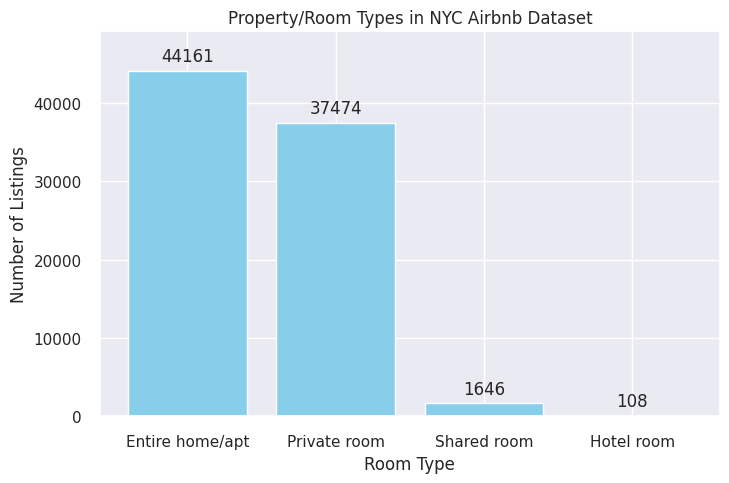

In [48]:
# ======================================
# 📊 Room Type Count Visualization
# ======================================

plt.figure(figsize=(8,5))
room_type_bar = plt.bar(property_types['Room Type'], property_types['Count'], color='skyblue')
plt.bar_label(room_type_bar, labels=property_types['Count'], padding=4)
plt.ylim(0, property_types['Count'].max() + 5000)
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.title('Property/Room Types in NYC Airbnb Dataset')
plt.show()

The Airbnb open dataset reveals four distinct property or room types. These categories comprise.
* Entire home/apt
* Private room
* Shared room
* Hotel room

Notably, the barchart illustrates that Entire home/apt dominates the dataset with 44,163 occurrences, followed by Private room with 37,494 occurrences. Shared room and Hotel room trail behind with 1,646 and 108 occurrences, respectively.

### Which neighborhood group has the highest number of listings?

In [49]:
# ======================================
# 🏙️ Neighborhood Group Analysis
# ======================================

# Count of listings in each neighborhood group
hood_group = df['neighbourhood group'].value_counts().to_frame().reset_index()
hood_group.columns = ['Neighborhood Group', 'Count']
print("✅ Number of Listings per Neighborhood Group:")
display(hood_group)

✅ Number of Listings per Neighborhood Group:


,Neighborhood Group,Count
0,Brooklyn,34622
1,Manhattan,34560
2,Queens,11124
3,Bronx,2267
4,Staten Island,816


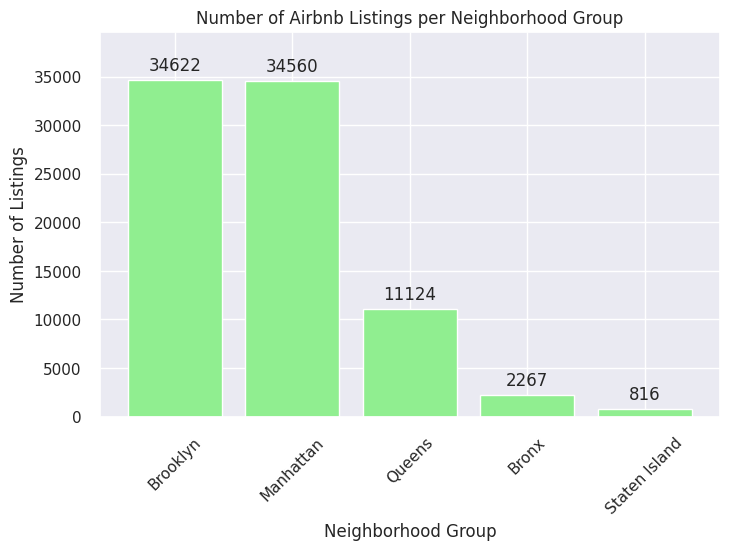

In [50]:
# ======================================
# 📊 Neighborhood Group Listings Visualization
# ======================================

plt.figure(figsize=(8,5))
hood_group_bar = plt.bar(hood_group['Neighborhood Group'], hood_group['Count'], color='lightgreen')
plt.bar_label(hood_group_bar, labels=hood_group['Count'], padding=4)
plt.ylim(0, hood_group['Count'].max() + 5000)
plt.xticks(rotation=45)
plt.xlabel('Neighborhood Group')
plt.ylabel('Number of Listings')
plt.title('Number of Airbnb Listings per Neighborhood Group')
plt.show()

The dataset contains five different neighborhood groups, namely Brooklyn, Manhattan, Queens, Bronx, and Staten Island. According to the
barchart, Brooklyn has the highest number of listings with 34636, followed closely by Manhattan with 34566.

### Which neighborhoods group have the highest average prices for Airbnb listings?

✅ Average Price per Neighborhood Group:


,Neighborhood Group,Average Price ($)
0,Queens,630.502517
1,Bronx,630.201147
2,Brooklyn,627.434261
3,Manhattan,623.435561
4,Staten Island,622.132353


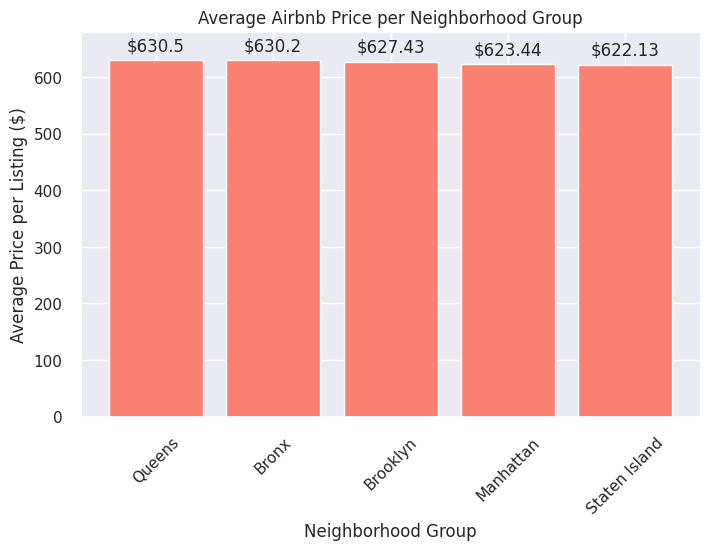

In [51]:
# ======================================
# 💰 Average Price per Neighborhood Group
# ======================================

# Calculate average price per neighborhood group
avg_price = df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending=False).to_frame().reset_index()
avg_price.columns = ['Neighborhood Group', 'Average Price ($)']
print("✅ Average Price per Neighborhood Group:")
display(avg_price)

# 📊 Bar chart visualization
plt.figure(figsize=(8,5))
avg_price_bar = plt.bar(avg_price['Neighborhood Group'], avg_price['Average Price ($)'], color='salmon')
plt.bar_label(avg_price_bar, labels=[f"${round(x,2)}" for x in avg_price['Average Price ($)']], label_type='edge', padding=4)
plt.ylim(0, avg_price['Average Price ($)'].max() + 50)
plt.xticks(rotation=45)
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price per Listing ($)')
plt.title('Average Airbnb Price per Neighborhood Group')
plt.show()

Among the five identified neighborhood groups in the dataset, Queens boasts the highest average listing price at 630.46 USD, closely trailed by the Bronx with an average listing price of 630.20 USD. Conversely, Staten Island records the lowest average listing price at 622.13 USD.

### Is there a relationship between the construction year of property and price?

✅ Average Price by Construction Year:


,Construction Year,Average Price ($)
0,2003,623.394610
1,2004,633.108207
2,2005,622.162324
3,2006,631.194917
4,2007,629.062274


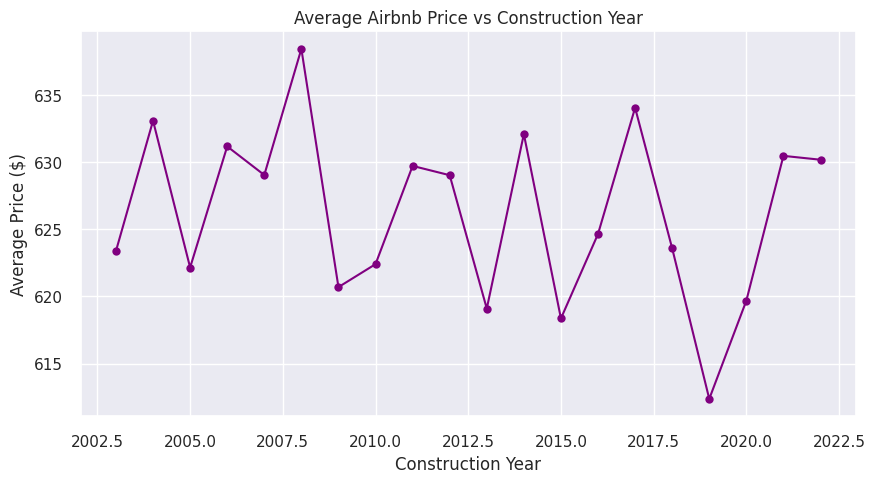

In [52]:
# ======================================
# 🏗️ Construction Year vs Average Price
# ======================================

# Calculate average price per construction year
avg_price_year = df.groupby('Construction year')['price_$'].mean().to_frame().reset_index()
avg_price_year.columns = ['Construction Year', 'Average Price ($)']

# Display the first few rows for inspection
print("✅ Average Price by Construction Year:")
display(avg_price_year.head())

# 📈 Line plot visualization
plt.figure(figsize=(10,5))
plt.plot(avg_price_year['Construction Year'], avg_price_year['Average Price ($)'], marker='o', linestyle='-', color='purple')
plt.xlabel('Construction Year')
plt.ylabel('Average Price ($)')
plt.title('Average Airbnb Price vs Construction Year')
plt.grid(True)
plt.show()

The line plot depicting the construction year of properties versus the average price per property reveals a noticeable downward trend in prices
as the construction years progress. The pattern demonstrates decreasing lows and highs. suggesting an overall decline in property prices as
time progresses.

### Who are the top 10 hosts by calculated host listing count?
From the numerous hosts in the dataset. we will see the 10 hosts with the highest calculated host count.

✅ Top 10 Hosts by Calculated Host Listings Count:


,Host Name,Listings Count
0,Sonder (NYC),111921.0
1,Karen,42410.0
2,Jeniffer,31447.0
3,Blueground,21168.0
4,Kaz,17552.0
5,Corporate Housing,14833.0
6,Soya,10260.0
7,Stay With Vibe,10260.0
8,Kara,10092.0
9,Jeremy & Laura,10080.0


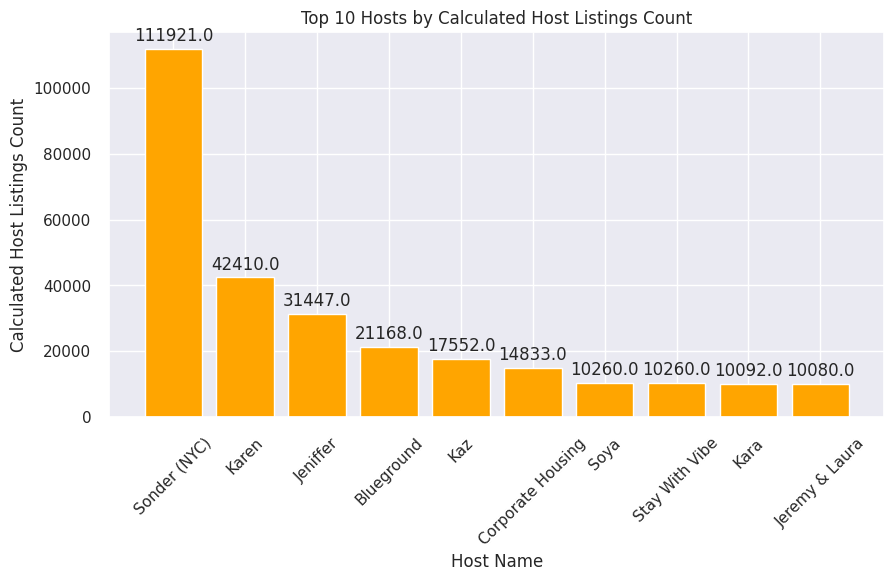

In [53]:
# ======================================
# 👑 Top 10 Hosts by Calculated Host Listings Count
# ======================================

# Calculate top 10 hosts
top_hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending=False).nlargest(10).to_frame().reset_index()
top_hosts.columns = ['Host Name', 'Listings Count']
print("✅ Top 10 Hosts by Calculated Host Listings Count:")
display(top_hosts)

# 📊 Bar chart visualization
plt.figure(figsize=(10,5))
hosts_bar = plt.bar(top_hosts['Host Name'], top_hosts['Listings Count'], color='orange')
plt.bar_label(hosts_bar, labels=top_hosts['Listings Count'], label_type='edge', padding=3)
plt.xticks(rotation=45)
plt.ylim(0, top_hosts['Listings Count'].max() + 5000)
plt.xlabel('Host Name')
plt.ylabel('Calculated Host Listings Count')
plt.title('Top 10 Hosts by Calculated Host Listings Count')
plt.show()

The bar chart above illustrates the top 10 hosts based on the calculated listing count, with Sonder(NYC) notably leading with 111,921 listings. Subsequently, the other hosts follow in descending order.

* Karen at second postion with 42410 hosts
* Jeniffer at third position with 31447 hosts
* Blueground at fourth position with 21168 hosts
* Kaz at fifth position with 17552 hosts
* Corporate Housing at sixth position with 14833 hosts
* Soya at seventh positon with 10260 hosts
* Stay with vibe at eight position with 10260 hosts
* Kara at ninth position with 10092 hosts
* and finally Jeremy and Laura at tenth position 10080 hosts

### Are hosts with verified identities more likely to receive positive reviews?

✅ Average Review Rate by Host Verification Status:


,Host Verification Status,Average Review Rate
0,verified,3.284066
1,unconfirmed,3.273325


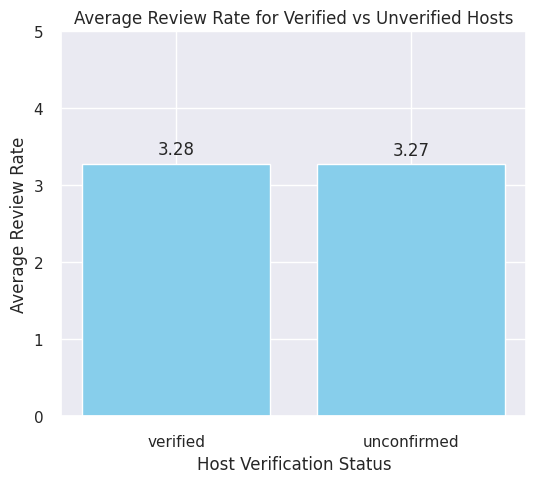

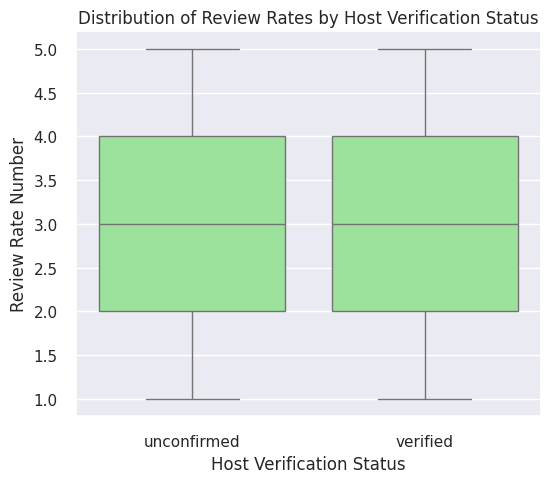

In [54]:
# ======================================
# ✅ Host Verification vs Average Review Rate
# ======================================

# Calculate average review rate based on host verification status
review_avg = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending=False).to_frame().reset_index()
review_avg.columns = ['Host Verification Status', 'Average Review Rate']
print("✅ Average Review Rate by Host Verification Status:")
display(review_avg)

# 📊 Bar chart visualization
plt.figure(figsize=(6,5))
review_bar = plt.bar(review_avg['Host Verification Status'], review_avg['Average Review Rate'], color='skyblue')
plt.bar_label(review_bar, labels=[round(x,2) for x in review_avg['Average Review Rate']], padding=4)
plt.ylim(0, 5)
plt.xlabel('Host Verification Status')
plt.ylabel('Average Review Rate')
plt.title('Average Review Rate for Verified vs Unverified Hosts')
plt.show()

# 📊 Boxplot visualization for distribution
plt.figure(figsize=(6,5))
sns.boxplot(data=df, x='host_identity_verified', y='review rate number', color='lightgreen')
plt.xlabel('Host Verification Status')
plt.ylabel('Review Rate Number')
plt.title('Distribution of Review Rates by Host Verification Status')
plt.show()

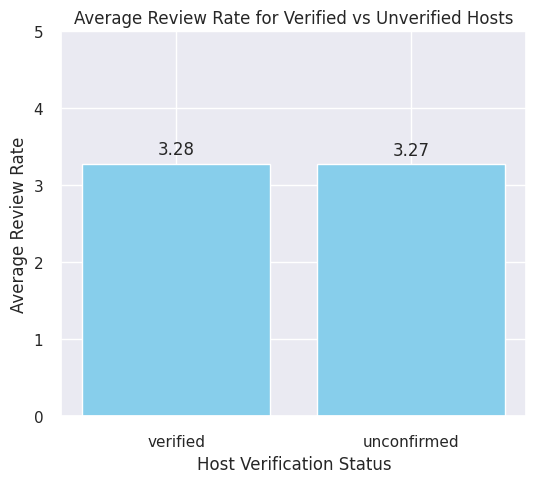

In [55]:
# ======================================
# 📊 Bar Chart: Average Review Rate by Host Verification
# ======================================

plt.figure(figsize=(6,5))
review_bar = plt.bar(review_avg['Host Verification Status'], review_avg['Average Review Rate'], color='skyblue')
plt.bar_label(review_bar, labels=[round(x,2) for x in review_avg['Average Review Rate']], padding=4)
plt.ylim(0, 5)  # Review rates usually range from 0 to 5
plt.xlabel('Host Verification Status')
plt.ylabel('Average Review Rate')
plt.title('Average Review Rate for Verified vs Unverified Hosts')
plt.show()

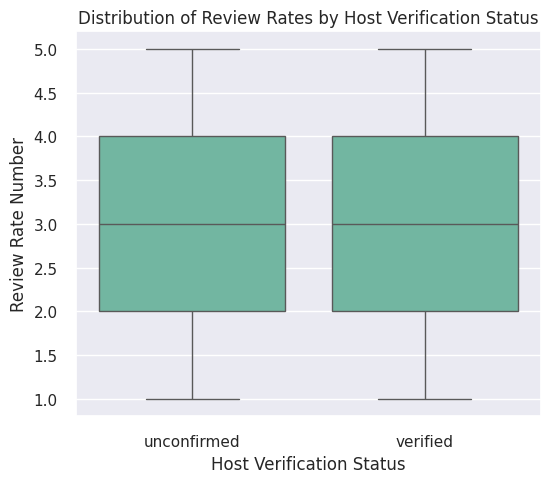

In [56]:
# ======================================
# 📊 Boxplot: Distribution of Review Rates by Host Verification Status
# ======================================

base_color = sns.color_palette()[0]

plt.figure(figsize=(6,5))
sns.boxplot(data=df, x="host_identity_verified", y="review rate number", color=base_color)
plt.xlabel('Host Verification Status')
plt.ylabel('Review Rate Number')
plt.title('Distribution of Review Rates by Host Verification Status')
plt.show()

The average review rates for verified and unconfirmed hosts are 3.27 and 3.28, respectively, indicating a marginal difference in their review rates, with unconfirmed hosts having a slightly higher rate. This suggests that verified hosts are not necessarily more likely to receive positive reviews compared to unconfirmed hosts.


### Is there a correlation between the price of a listing and its service fee?

In [57]:
# ======================================
# 💵 Correlation: Price vs Service Fee
# ======================================

# Calculate Pearson correlation coefficient
correlation = df['price_$'].corr(df['service_fee_$'])
print(f"✅ Pearson Correlation between Price and Service Fee: {correlation:.2f}")

✅ Pearson Correlation between Price and Service Fee: 1.00


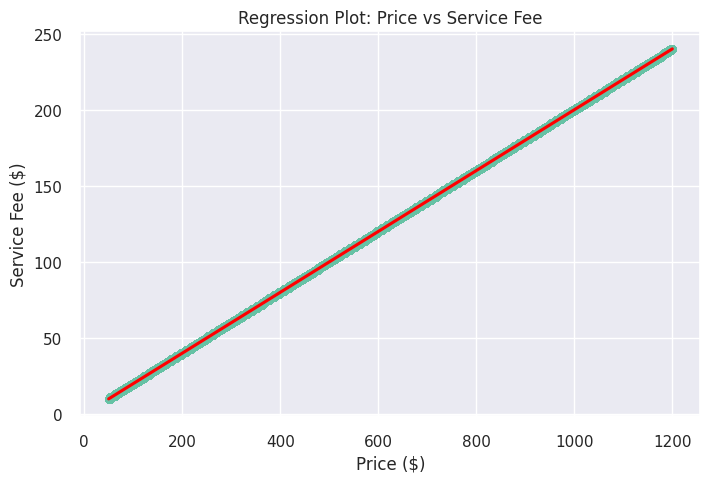

In [58]:
# ======================================
# 📈 Regression Plot: Price vs Service Fee
# ======================================

plt.figure(figsize=(8,5))
sns.regplot(data=df, x='price_$', y='service_fee_$', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.xlabel('Price ($)')
plt.ylabel('Service Fee ($)')
plt.title('Regression Plot: Price vs Service Fee')
plt.show()

The Pearson correlation coefficient between the pnce and service fee is 0.99, indicating a highly robust positive correlation between these variables. On the regression Piot, each point forms a rising diagonal line towards the right, signifying that as the price of a property increases, so does its service fee.

### What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?

✅ Average Review Rate by Neighborhood Group and Room Type:


,Neighborhood Group,Room Type,Average Review Rate
0,Bronx,Entire home/apt,3.381881
1,Bronx,Private room,3.305810
2,Bronx,Shared room,3.356322
3,Brooklyn,Entire home/apt,3.242491
4,Brooklyn,Hotel room,3.833333
5,Brooklyn,Private room,3.274773
6,Brooklyn,Shared room,3.323383
7,Manhattan,Entire home/apt,3.268846
8,Manhattan,Hotel room,3.500000
9,Manhattan,Private room,3.285431


/tmp/ipython-input-1966745948.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='neighbourhood group', y='review rate number', hue='room type', ci=None, palette='Set2')


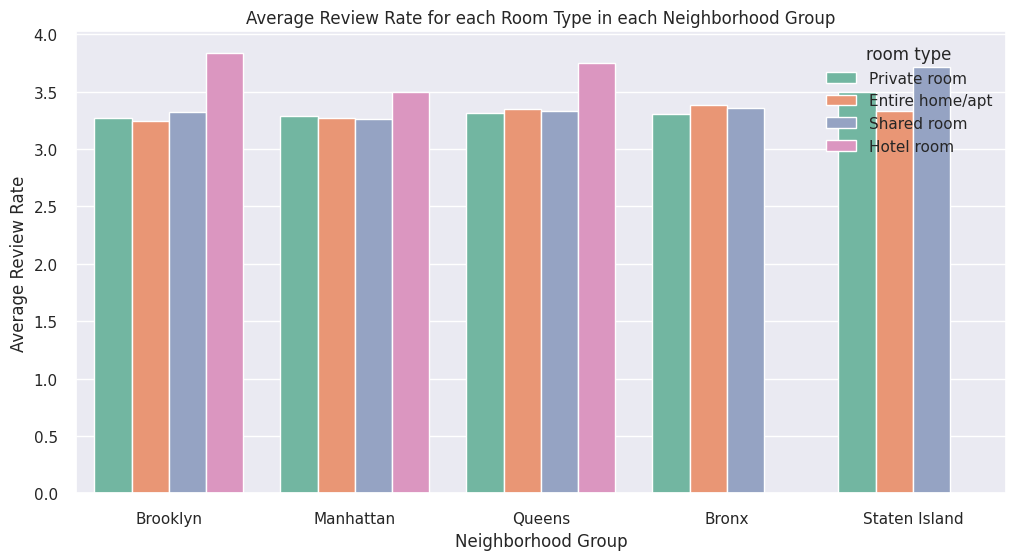

In [59]:
# ======================================
# ⭐ Average Review Rate by Neighborhood Group & Room Type
# ======================================

# Calculate average review rate
avg_review_group = df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame().reset_index()
avg_review_group.columns = ['Neighborhood Group', 'Room Type', 'Average Review Rate']
print("✅ Average Review Rate by Neighborhood Group and Room Type:")
display(avg_review_group)

# 📊 Bar plot visualization
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='neighbourhood group', y='review rate number', hue='room type', ci=None, palette='Set2')
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Review Rate')
plt.title('Average Review Rate for each Room Type in each Neighborhood Group')
plt.show()

/tmp/ipython-input-4281027662.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='neighbourhood group', y='review rate number', hue='room type', ci=None, palette='Set2')


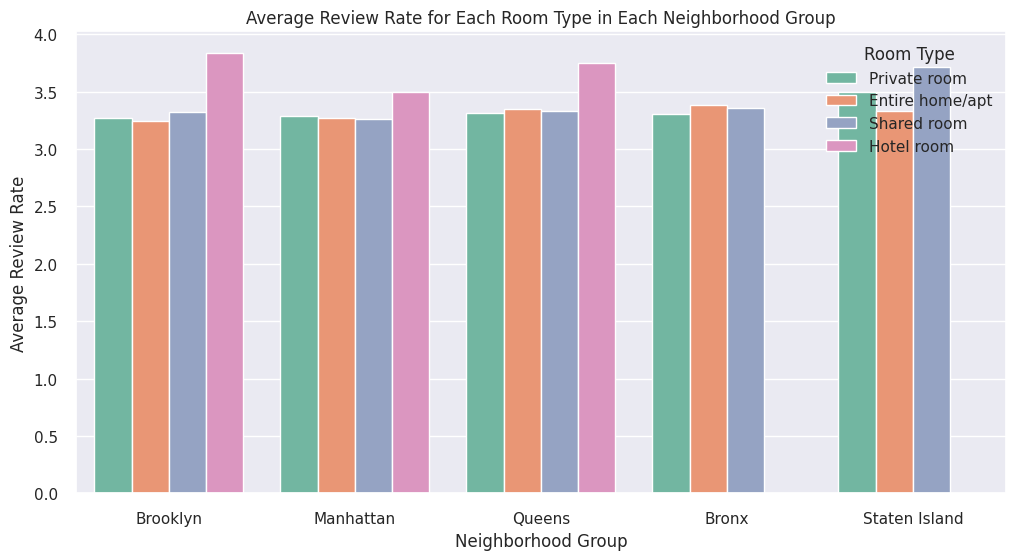

In [60]:
# ======================================
# 📊 Barplot: Average Review Rate by Neighborhood Group & Room Type
# ======================================

plt.figure(figsize=(12,6))
sns.barplot(data=df, x='neighbourhood group', y='review rate number', hue='room type', ci=None, palette='Set2')
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Review Rate')
plt.title('Average Review Rate for Each Room Type in Each Neighborhood Group')
plt.legend(title='Room Type')
plt.show()

Hotel rooms exhibit has higher review rate compared to all other property types within the three neighborhood groups where they are located:
Brooklyn, Manhattan, and Queens.

### Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?

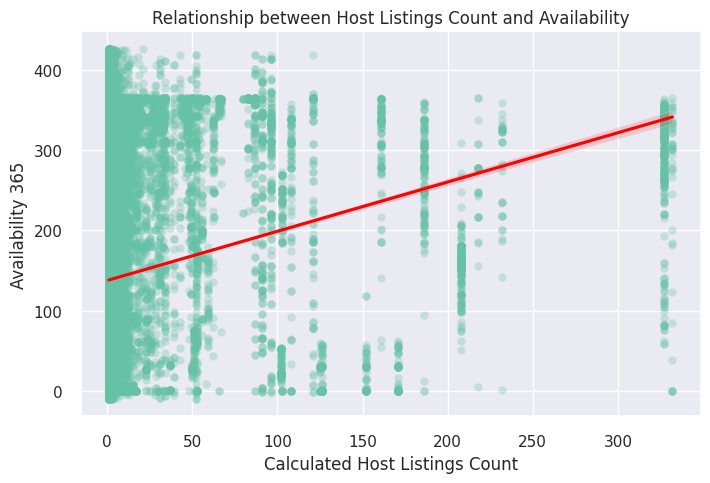

✅ Pearson Correlation between Host Listings Count and Availability: 0.14


In [61]:
# ======================================
# 📈 Regression Plot: Host Listings Count vs Availability
# ======================================

plt.figure(figsize=(8,5))
sns.regplot(data=df, x='calculated host listings count', y='availability 365',
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.xlabel('Calculated Host Listings Count')
plt.ylabel('Availability 365')
plt.title('Relationship between Host Listings Count and Availability')
plt.show()

# Calculate Pearson correlation
correlation_avail = df['calculated host listings count'].corr(df['availability 365'])
print(f"✅ Pearson Correlation between Host Listings Count and Availability: {correlation_avail:.2f}")

In [62]:
# ======================================
# 📊 Correlation: Host Listings Count vs Availability 365
# ======================================

correlation_avail = df['calculated host listings count'].corr(df['availability 365'])
print(f"✅ Pearson Correlation between Calculated Host Listings Count and Availability 365: {correlation_avail:.2f}")

✅ Pearson Correlation between Calculated Host Listings Count and Availability 365: 0.14


The Pearson correlation coefficient for the association between calculated host listings and availability 365 is 0.136, indicating a weak positive correlation between the two variables.

### Conclusion
In conclusion, this project has provided a comprehensive analysis of the New York City Airbnb dataset, shedding light on various aspects of the short-term lodging market. Through data wrangling, exploratory data analysis (EDA), and interpretation of summary statistics, we've uncovered valuable insights into listing distribution, pricing dynamics. host, and review analysis.

Key findings include the dominance in counts of Entire home/apt listings, the variability in listing counts across neighborhood groups, and the downward trend between property construction year and price. Additionally, the analysis highlighted the significance of verified host status on review rates, as well as the strong correlation between listing price and service fee.

Furthermore, conducting sentiment analysis on guest reviews to understand factors driving customer satisfaction and preferences could inform targeted marketing strategies and product Improvements for Airbnb. Lastly, expanding the analysis to include predictive modeling techniques, such as regression or machine learning algorithms, could enable forecasting of listing demand, pricing trends, and customer behavior, facilitating strategic decision-making for stakeholders in the short-term lodging industry.